In [1]:
## 导入相关的库

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import plot_model
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

pd.set_option('max_rows',8)
pd.set_option('max_columns',8)

In [4]:
# 加载数据集：查看数据介绍， 并转为DataFrame
dataset_cancer = datasets.load_breast_cancer()    # 加载癌细胞数据集

print(dataset_cancer['DESCR'])

df = pd.DataFrame(dataset_cancer.data, columns=dataset_cancer.feature_names)  

df['label'] = dataset_cancer.target

print(df.shape)

df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,...,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,...,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,...,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,...,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,...,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,...,0.1625,0.2364,0.07678,0


In [5]:
# 探索性数据分析EDA：安装并使用pandas_profiling库；分析数据数值情况，缺失率及相关性等。

In [ ]:
import pandas_profiling

pandas_profiling.ProfileReport(df, title='Breast Cancer DataSet EDA')

In [176]:
# 特征工程方面主要的处理有：分析特征无明显异常值及缺失的情况需要处理，已有mean/standard error等衍生特征。结合相关性等指标做特征选择(过滤法)。对特征进行标准化以加速模型学习过程。

In [188]:
# 相关性>0.99的特征清单列表及标签
# drop_feas = ['mean_concavity','mean_perimeter','mean_radius',
# 'perimeter_error','radius_error','worst_area',
# 'worst_concave_points','worst_perimeter',
# 'worst_radius','worst_texture','label']
drop_feas = ['label','worst_radius','mean_radius']
# 选择标签y及特征x
y = df.label
x = df.drop(drop_feas,axis=1)  # 删除相关性强特征及标签列


# holdout验证法： 按3：7划分测试集 训练集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 特征z-score 标准化

sc = StandardScaler()
x_train = sc.fit_transform(x_train)  # 注：训练集测试集要分别归一化，以免测试集信息泄露到模型训练
x_test = sc.transform(x_test) 

In [189]:
# 模型训练：使用keras搭建逻辑回归模型，训练模型，观察模型训练集及验证集的损失并使用F1-score模型评估

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 29        
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
16/16 [==============================] - 0s 15ms/step - loss: 89.6225 - val_loss: 53.3915
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 77.5771 - val_loss: 41.4275
Epoch 3/1000
16/16 [==============================] - 0s 5ms/step - loss: 52.2417 - val_loss: 29.9011
Epoch 4/1000
16/16 [==============================] - 0s 5ms/step - loss: 40.7185 - val_loss: 18.0898
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 26.5391 - val_loss: 6.4244
Epoch 6/1000
16/16 [==============================] - 0s 5ms/step - loss: 10.6463 - val_loss: 0.9365
Epoch 7/1000
16/16 [====================

16/16 [==============================] - 0s 4ms/step - loss: 0.1535 - val_loss: 0.1159
Epoch 158/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.2059 - val_loss: 0.1329
Epoch 159/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1999 - val_loss: 0.1886
Epoch 160/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1704 - val_loss: 0.1003
Epoch 161/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1879 - val_loss: 0.1597
Epoch 162/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.2085 - val_loss: 0.1456
Epoch 163/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.2048 - val_loss: 0.1038
Epoch 164/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.2138 - val_loss: 0.1238
Epoch 165/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1983 - val_loss: 0.1321
Epoch 166/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1881 - val_loss: 0.

16/16 [==============================] - 0s 4ms/step - loss: 0.1136 - val_loss: 0.0826
Epoch 318/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1258 - val_loss: 0.0836
Epoch 319/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1214 - val_loss: 0.0824
Epoch 320/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1121 - val_loss: 0.0889
Epoch 321/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1256 - val_loss: 0.0818
Epoch 322/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1428 - val_loss: 0.0947
Epoch 323/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1315 - val_loss: 0.0831
Epoch 324/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1048 - val_loss: 0.0908
Epoch 325/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.1072 - val_loss: 0.0950
Epoch 326/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1159 - val_loss: 0.

16/16 [==============================] - 0s 5ms/step - loss: 0.1000 - val_loss: 0.1283
Epoch 478/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1281 - val_loss: 0.0832
Epoch 479/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1029 - val_loss: 0.0779
Epoch 480/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1023 - val_loss: 0.0777
Epoch 481/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1188 - val_loss: 0.0982
Epoch 482/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1175 - val_loss: 0.0919
Epoch 483/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1042 - val_loss: 0.0939
Epoch 484/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1057 - val_loss: 0.0871
Epoch 485/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1203 - val_loss: 0.0877
Epoch 486/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1195 - val_loss: 0.

16/16 [==============================] - 0s 5ms/step - loss: 0.0952 - val_loss: 0.0794
Epoch 638/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0781 - val_loss: 0.0765
Epoch 639/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0887 - val_loss: 0.0766
Epoch 640/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0999 - val_loss: 0.0806
Epoch 641/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0974 - val_loss: 0.0824
Epoch 642/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0879 - val_loss: 0.0897
Epoch 643/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1245 - val_loss: 0.0974
Epoch 644/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0778 - val_loss: 0.0880
Epoch 645/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0999 - val_loss: 0.0807
Epoch 646/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0847 - val_loss: 0.

16/16 [==============================] - 0s 5ms/step - loss: 0.1159 - val_loss: 0.0849
Epoch 798/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0846 - val_loss: 0.0774
Epoch 799/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0880 - val_loss: 0.0834
Epoch 800/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1048 - val_loss: 0.1137
Epoch 801/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.1114 - val_loss: 0.0988
Epoch 802/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0985 - val_loss: 0.0950
Epoch 803/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0992 - val_loss: 0.0958
Epoch 804/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0954 - val_loss: 0.0949
Epoch 805/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0951 - val_loss: 0.1343
Epoch 806/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1297 - val_loss: 0.

16/16 [==============================] - 0s 5ms/step - loss: 0.0806 - val_loss: 0.0820
Epoch 958/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0808 - val_loss: 0.0891
Epoch 959/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0955 - val_loss: 0.0755
Epoch 960/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0930 - val_loss: 0.0801
Epoch 961/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0862 - val_loss: 0.0853
Epoch 962/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0922 - val_loss: 0.0781
Epoch 963/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0996 - val_loss: 0.0768
Epoch 964/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0973 - val_loss: 0.0756
Epoch 965/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1048 - val_loss: 0.1276
Epoch 966/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.1214 - val_loss: 0.

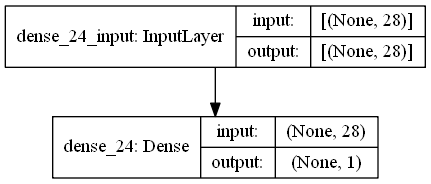

In [190]:
_dim = x_train.shape[1]   # 输入模型的特征数

# LR逻辑回归模型
model = Sequential()   
model.add(Dense(1, input_dim=_dim, activation='sigmoid'))  # 添加网络层，激活函数sigmoid

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy')  #模型编译：选择交叉熵损失函数及adam梯度下降法优化算法



model.fit(x, y, validation_split=0.1, epochs=1000)   # 模型迭代训练: validation_split比例0.3, 迭代epochs200次

plot_model(model, show_shapes=True)

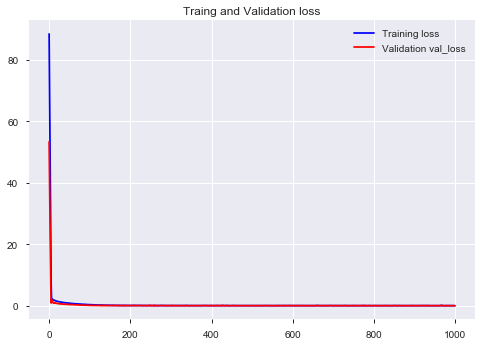

In [191]:
# 模型训练集及验证集的损失

plt.figure()
plt.plot(model.history.history['loss'],'b',label='Training loss')
plt.plot(model.history.history['val_loss'],'r',label='Validation val_loss')
plt.title('Traing and Validation loss')
plt.legend()
plt.show()

In [192]:
# 模型评估 f1score

def model_metrics(model, x, y):
    """
    评估函数
    """
    yhat = model.predict(x).round() #模型预测yhat，预测阈值按默认0.5划分
    result = {
              'f1_score': f1_score(y, yhat),
              'precision':precision_score(y, yhat),
              'recall':recall_score(y, yhat)
             }
    return result


# 模型评估结果
print("TRAIN")
print(model_metrics(model, x_train, y_train))

print("TEST")
print(model_metrics(model, x_test, y_test))

TRAIN
{'f1_score': 0.8949044585987262, 'precision': 0.921311475409836, 'recall': 0.8699690402476781}
TEST
{'f1_score': 0.8857142857142858, 'precision': 0.8611111111111112, 'recall': 0.9117647058823529}


In [40]:
print(model.layers[0].get_weights())  # 模型参数权重系数 W，偏置项b



[array([[ 2.1556859e-01],
       [-1.3468576e-03],
       [ 7.3584461e-01],
       [-2.5198472e-01],
       [-5.7716030e-01],
       [ 2.9476243e-01],
       [ 2.5154513e-01],
       [ 1.0482019e+00],
       [-1.4354216e-01],
       [ 9.5945591e-01],
       [ 1.0656936e-01],
       [ 1.3004006e-01],
       [ 2.7753282e-01],
       [ 3.9135188e-01],
       [ 1.3914996e+00],
       [ 5.6347537e-01],
       [-7.1050149e-01],
       [-1.1952614e+00],
       [-8.8952318e-02],
       [ 1.0625340e-01]], dtype=float32), array([0.56512904], dtype=float32)]
